In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# load data from data/train.csv into a pandas dataframe
df = pd.read_csv('data/train.csv')

y = df['Transported'].astype('int64')

#copy X
X = df.copy(deep=True)
# split Cabin into Deck, Number and Side
X[['Cabin_Deck', 'Cabin_Number', 'Cabind_Side']] = X['Cabin'].str.split('/', expand=True)
# cast Cabin_number as int
X['Cabin_Number'] = X['Cabin_Number'].astype('float64')
# drop Cabin, PassengerId and Name
X.drop(['Cabin', 'PassengerId', 'Name', 'Transported'], axis=1, inplace=True)

# identify columns with bool data type
bool_cols = [col for col in X.columns if X[col].dtype == 'bool']
# set bool columns to int
X[bool_cols] = X[bool_cols].astype('int64')

# generate numerical columns and categorical column lists from X_train datatypes   
numerical_columns = X.select_dtypes(include=['float64', 'int64', 'bool']).columns
categorical_columns = X.select_dtypes(include=['object']).columns


In [6]:
numeric_data = X[numerical_columns]
numeric_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Number
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [22]:
# statistics for numeric_data greater than zero
numeric_data[numeric_data > 0].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Number
count,8336.000000,2935.000000,3054.000000,2898.000000,3186.000000,3010.000000,8476.000000
mean,29.443498,651.632368,1276.436477,508.658385,831.070621,861.392027,601.642638
std,14.010294,1005.556487,2488.548489,948.906017,1737.733738,1797.300831,511.661382
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,37.000000,39.000000,22.000000,27.000000,28.000000,169.000000
50%,27.000000,320.000000,396.500000,195.000000,226.500000,260.000000,429.000000
75%,38.000000,848.000000,1255.750000,693.000000,769.000000,806.500000,1000.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


/Users/jimhitt/anaconda3/envs/2023_12_26_KaggleTitanic/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimhitt/anaconda3/envs/2023_12_26_KaggleTitanic/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimhitt/anaconda3/envs/2023_12_26_KaggleTitanic/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jimhitt/anaconda3/envs/2023_12_26_KaggleTitanic/lib/python3.11/site-pack

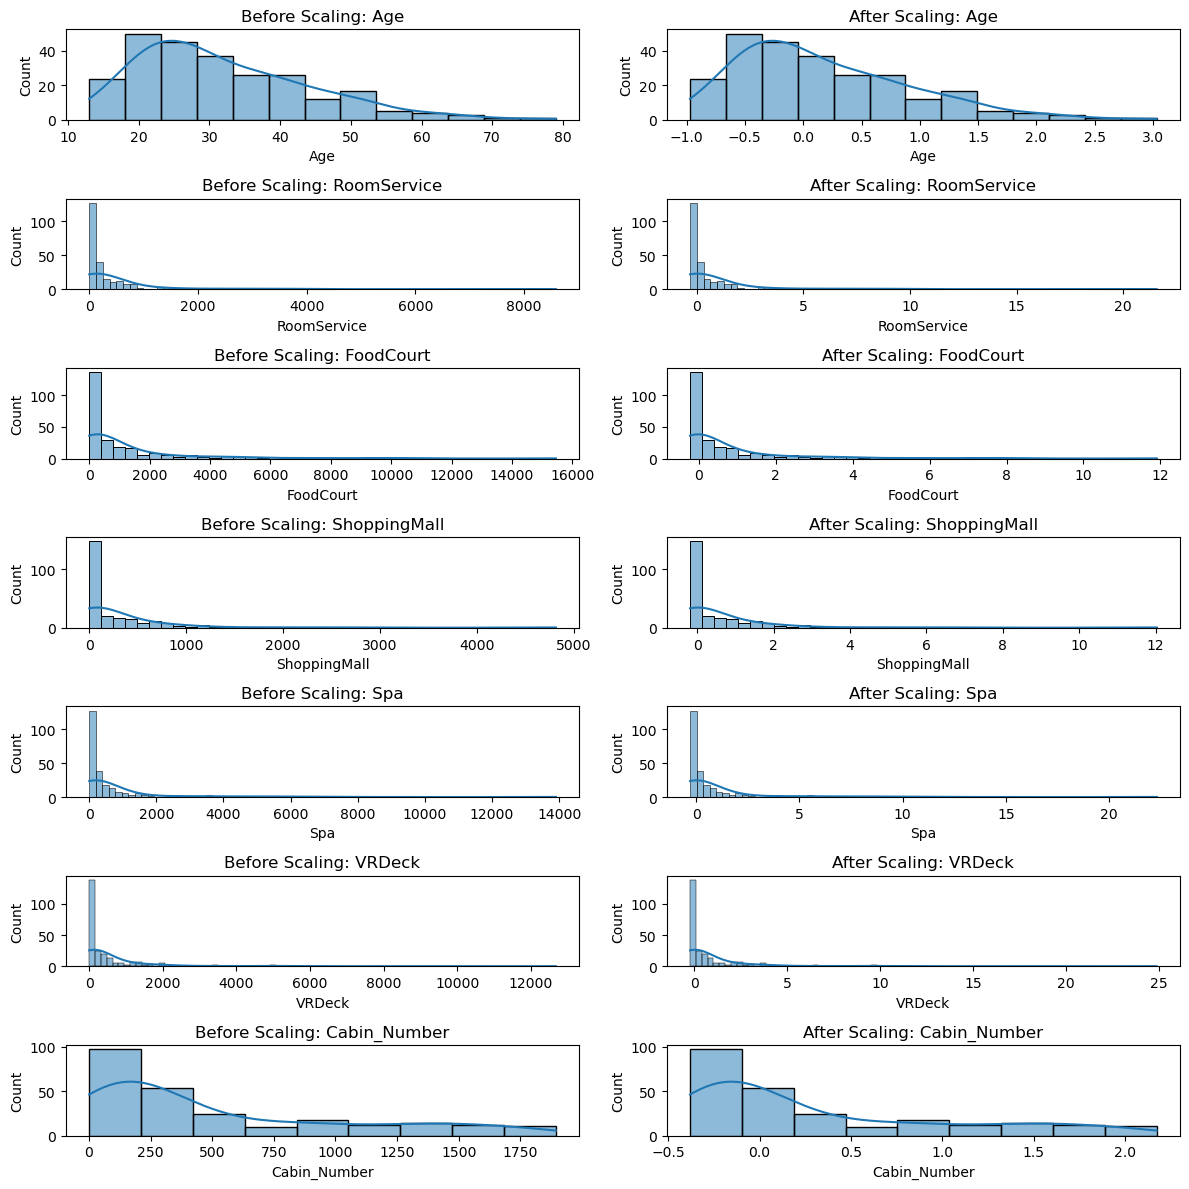

In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

robust_scaler = RobustScaler()
numeric_imputer = SimpleImputer(strategy='median')

numeric_data = X[numerical_columns]
numeric_data_impute = numeric_imputer.fit_transform(numeric_data)
numeric_data_impute = pd.DataFrame(numeric_data_impute, columns=numeric_data.columns)

# keep values of numeric_data_impute that are > 0
numeric_data_impute = numeric_data_impute[numeric_data_impute > 0].dropna()

numeric_data_scaled = robust_scaler.fit_transform(numeric_data_impute)

scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns)


# Plotting distributions before and after scaling
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 12))

for i, col in enumerate(numerical_columns):
    # Before scaling
    sns.histplot(numeric_data_impute[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Before Scaling: {col}')
    
    # After scaling
    sns.histplot(scaled_df[col], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'After Scaling: {col}')

plt.tight_layout()
plt.show()


In [16]:
# count number and percent (2 significant digits) of zero values in FoodCort column
zero_count = (X['FoodCourt'] == 0).sum()
zero_percent = round(zero_count / len(X['FoodCourt']) * 100, 2)
print(f'Number of zero values in FoodCourt column: {zero_count}')
print(f'Percent of zero values in FoodCourt column: {zero_percent}%')

# print the median, mean, and standard deviation of the FoodCourt column for values greater than zero
food_court = X[X['FoodCourt'] > 0]['FoodCourt']
print(food_court.describe())


Number of zero values in FoodCourt column: 5456
Percent of zero values in FoodCourt column: 62.76%
count     3054.000000
mean      1276.436477
std       2488.548489
min          1.000000
25%         39.000000
50%        396.500000
75%       1255.750000
max      29813.000000
Name: FoodCourt, dtype: float64


### There are 4 onboard spending options:
- FoodCourt
- ShoppingMall
- Spa
- VRDeck

Most passengers seem to spend $0, and then it is a skewed distributio even with scaling

#### Will try binning that variable

In [29]:
onboard_spending = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

spending_df = X[onboard_spending].copy(deep=True)

# create a column in spneding_df that is the sum of all columns in spending_df ignoring NaN values
spending_df['TotalSpending'] = spending_df.sum(axis=1, skipna=True)

print(spending_df['TotalSpending'].describe())

# print the number and percent of passengers that spent 0 dollars in TotalSpending
print(f"{'-'*45}")
zero_count = (spending_df['TotalSpending'] == 0).sum()
zero_percent = round(zero_count / len(spending_df['TotalSpending']) * 100, 2)
print(f'Number of zero values in TotalSpending column: {zero_count}')
print(f'Percent of zero values in TotalSpending column: {zero_percent}%')


count     8693.000000
mean      1220.857011
std       2724.973223
min          0.000000
25%          0.000000
50%        236.000000
75%        963.000000
max      35862.000000
Name: TotalSpending, dtype: float64
---------------------------------------------
Number of zero values in TotalSpending column: 3719
Percent of zero values in TotalSpending column: 42.78%


/Users/jimhitt/anaconda3/envs/2023_12_26_KaggleTitanic/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TotalSpending', ylabel='Count'>

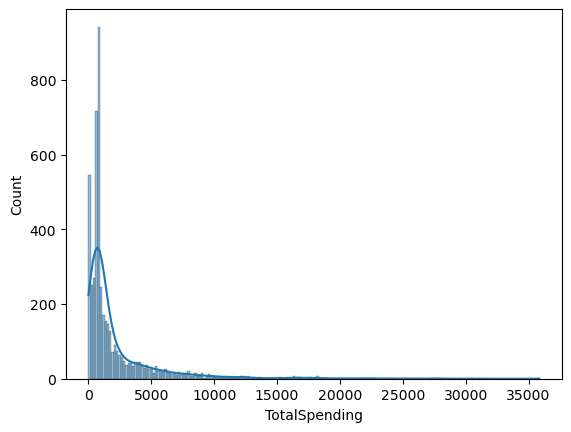

In [30]:
# plot historgram of TotalSpending including values > 0
sns.histplot(spending_df['TotalSpending'][spending_df['TotalSpending'] > 0], kde=True)

In [37]:
# create categorical column from TotalSpending cut in bins 0, 1, 300, 3000, inf with the first bin [0, 1) labeled 'zero']
spending_df['TotalSpendingBin'] = pd.cut(spending_df['TotalSpending'], 
                                         bins=[0, 1, 500, 1000, np.inf],
                                         labels=['zero', 'low', 'medium', 'high'],
                                         right=False)


# print counts of each bin in TotalSpendingBin
print(spending_df['TotalSpendingBin'].value_counts())


TotalSpendingBin
zero      3719
high      2098
medium    1886
low        990
Name: count, dtype: int64
